<a href="https://colab.research.google.com/github/BoshiLee/pytorch_learning/blob/main/Mean_squar_error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![mse.jpg](https://imgur.com/q5teKV2.jpg)

In [78]:
!pip3 install torch

In [79]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

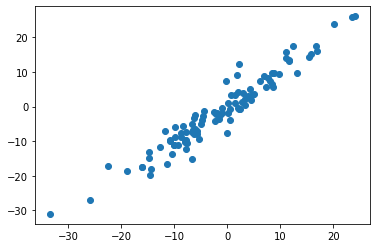

In [80]:
X = torch.randn(100, 1)*10
Y = X + 3*torch.randn(100, 1)
plt.xlabel = 'x'
plt.ylabel = 'y'
plt.plot(X.numpy(), Y.numpy(), 'o')

In [146]:
class LR(nn.Module): # 繼承 nn.Module
  def __init__(self, input_size, output_size):
    super(LR, self).__init__() # 必須先呼叫父層的 __init__
    self.linear = nn.Linear(input_size, output_size) # 建立自己的 linear module
  
  def forward(self, inputX):
    prediction = self.linear(inputX)
    return prediction

In [148]:
torch.manual_seed(1)
model = LR(1, 1)

In [149]:
def get_parameters(model: LR):
  [w, b] = model.parameters()
  w1 = w[0][0].item()
  b1 = b[0].item()
  return w1, b1

In [150]:
def fit_plot(title: str):
  plt.title = title
  w1, b1 = get_parameters(lr)
  x1 = X.numpy()
  y1 = w1*x1+b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, Y,) # 散佈圖
  plt.show()

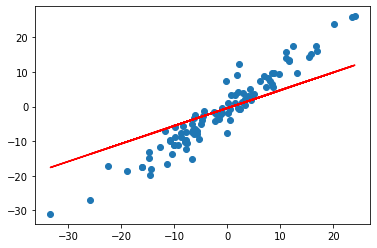

In [151]:
fit_plot('init model')

In [152]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [153]:
epochs = 100
losses = []

In [156]:
for e in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, Y)
  print("epoch:", e, "loss=" ,loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



epoch: 0 loss= 1.3833937784874855e+22
epoch: 1 loss= 1.7555923060216413e+22
epoch: 2 loss= 2.227928033500408e+22
epoch: 3 loss= 2.827344308644483e+22
epoch: 4 loss= 3.588031784284919e+22
epoch: 5 loss= 4.5533824176514495e+22
epoch: 6 loss= 5.778455641528436e+22
epoch: 7 loss= 7.333129758094123e+22
epoch: 8 loss= 9.306076140411808e+22
epoch: 9 loss= 1.1809852353248435e+23
epoch: 10 loss= 1.4987251778189228e+23
epoch: 11 loss= 1.9019519080077935e+23
epoch: 12 loss= 2.413665849620392e+23
epoch: 13 loss= 3.063053750977796e+23
epoch: 14 loss= 3.887157719015128e+23
epoch: 15 loss= 4.932988308226717e+23
epoch: 16 loss= 6.260184346606025e+23
epoch: 17 loss= 7.944462873104194e+23
epoch: 18 loss= 1.0081897196988086e+24
epoch: 19 loss= 1.2794393635275124e+24
epoch: 20 loss= 1.6236668489276025e+24
epoch: 21 loss= 2.060509095253513e+24
epoch: 22 loss= 2.614881024450174e+24
epoch: 23 loss= 3.318406696928199e+24
epoch: 24 loss= 4.2112089339694104e+24
epoch: 25 loss= 5.34422524879922e+24
epoch: 26 los

[Epoch, Batch size, Iteration, Learning Rate 名詞解釋](https://medium.com/%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7-%E5%80%92%E5%BA%95%E6%9C%89%E5%A4%9A%E6%99%BA%E6%85%A7/epoch-batch-size-iteration-learning-rate-b62bf6334c49)